### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [31]:
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, ParameterGrid
from sklearn.feature_selection import RFECV
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor, LogisticRegressionCV, RidgeCV

from sklearn import linear_model, ensemble

from sklearn.ensemble import StackingRegressor, VotingRegressor

### Import the Train data set and Test data set 

In [3]:
# loc_train = 'data\\train.csv'
# loc_test = 'data\\test.csv'

# target = 'y'
# evaluation = 'neg_mean_squared_error'

# raw_train_data = pd.read_csv(loc_train)
# y = raw_train_data[target]
# raw_train_data = raw_train_data.drop(target, axis=1)
# raw_test_data = pd.read_csv(loc_test)
# raw_train_data.head(5)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
evaluation = 'neg_mean_squared_error'
R, t = load_boston(True)
R = pd.DataFrame(R)
raw_train_data, raw_test_data, y, v = train_test_split(R, t, random_state=47, test_size=0.15)
raw_train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58
139,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46
422,12.04820,0.0,18.10,0.0,0.614,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63


In [5]:
pd.Series(y).describe()

count    430.000000
mean      22.362791
std        9.254023
min        5.000000
25%       16.600000
50%       20.950000
75%       25.000000
max       50.000000
dtype: float64

In [6]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 316 to 135
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       430 non-null    float64
 1   1       430 non-null    float64
 2   2       430 non-null    float64
 3   3       430 non-null    float64
 4   4       430 non-null    float64
 5   5       430 non-null    float64
 6   6       430 non-null    float64
 7   7       430 non-null    float64
 8   8       430 non-null    float64
 9   9       430 non-null    float64
 10  10      430 non-null    float64
 11  11      430 non-null    float64
 12  12      430 non-null    float64
dtypes: float64(13)
memory usage: 47.0 KB


In [7]:
raw_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.740302,11.275581,11.110535,0.072093,0.557199,6.285598,68.552558,3.778647,9.597674,408.304651,18.470698,356.219442,12.802674
std,8.973376,23.082228,6.932679,0.258943,0.119271,0.704589,28.179947,2.110552,8.780063,170.159524,2.129048,92.281920,7.127608
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.079095,0.000000,5.130000,0.000000,0.449000,5.878250,45.175000,2.073700,4.000000,277.000000,17.400000,376.602500,7.192500
50%,0.252775,0.000000,9.125000,0.000000,0.538000,6.183500,77.100000,3.107300,5.000000,330.000000,19.100000,391.475000,11.675000
75%,3.692267,12.500000,18.100000,0.000000,0.631000,6.623500,94.075000,5.117675,24.000000,666.000000,20.200000,396.237500,17.157500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Prepare the data for Machine Learning

In [8]:
def prepare(raw_DF):
    DF = raw_DF.copy()
    
    if 'Id' in DF.columns:
        DF.drop('Id', axis= 1, inplace= True)
    
    return DF

In [9]:
train_X = prepare(raw_train_data)
test_X = prepare(raw_test_data)

F = train_X.copy()
F['y'] = y
F.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,y
316,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8
139,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46,17.8
422,12.04820,0.0,18.10,0.0,0.614,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10,20.8
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8


In [10]:
F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 316 to 135
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       430 non-null    float64
 1   1       430 non-null    float64
 2   2       430 non-null    float64
 3   3       430 non-null    float64
 4   4       430 non-null    float64
 5   5       430 non-null    float64
 6   6       430 non-null    float64
 7   7       430 non-null    float64
 8   8       430 non-null    float64
 9   9       430 non-null    float64
 10  10      430 non-null    float64
 11  11      430 non-null    float64
 12  12      430 non-null    float64
 13  y       430 non-null    float64
dtypes: float64(14)
memory usage: 50.4 KB


### Visualize

In [11]:
F.corr().abs().sort_values('y', ascending=False).y

y     1.000000
12    0.734049
5     0.716769
2     0.512732
10    0.490786
9     0.480829
4     0.438669
6     0.404655
0     0.389386
8     0.387987
1     0.362130
11    0.346377
7     0.266480
3     0.199761
Name: y, dtype: float64

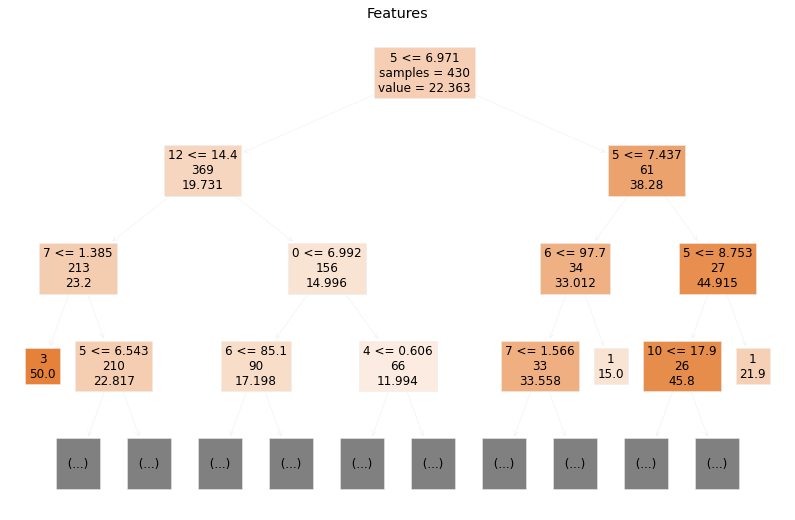

In [12]:
dt = DecisionTreeRegressor().fit(train_X, y)
plt.figure(figsize = (14, 9))
plot_tree(dt, 
          max_depth = 3, 
          filled = True, 
          fontsize=12, 
          label='root', 
          impurity=False, 
          feature_names=train_X.columns
         )
plt.title('Features')
plt.show()

### List of Regressors
https://scikit-learn.org/stable/supervised_learning.html

In [37]:
# https://scikit-learn.org/stable/supervised_learning.html

Regressors_small = [
    GradientBoostingRegressor(), 
    RidgeCV(),
    KNeighborsRegressor(), 
    RandomForestRegressor(),
    ExtraTreesRegressor(),
]

Regressors_medium = [
    linear_model.LarsCV(),
    linear_model.LassoCV(),
    linear_model.LassoLarsCV(),
    linear_model.ElasticNetCV(),
    linear_model.OrthogonalMatchingPursuitCV(),
    linear_model.BayesianRidge(), 
    linear_model.TweedieRegressor(),
    
    MLPRegressor(), 
    SVR(), 
    SGDRegressor(), 
    LinearSVR(),
    GaussianProcessRegressor(), 
    DecisionTreeRegressor(), 
    AdaBoostRegressor(),
    linear_model.PassiveAggressiveRegressor(),
    
    NuSVR(),
]

### Tips on Practical Use of some classifiers

https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use

https://scikit-learn.org/stable/modules/sgd.html#tips-on-practical-use

https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#tips-on-practical-use


### Parameter Grid

In [38]:
# parameter tuning
gbt_parameters = {
    'n_estimators': [100, 300, 500], 
    'loss': ['ls', 'lad', 'huber', 'quantile']
}

knn_parameters = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance']
}

rf_parameters = {
    'n_estimators': [100, 300, 500]
}

et_parameters = {
    'n_estimators': [100, 300, 500]
}

ridge_parameters = {
    'scoring': [None, evaluation]
}

### Making the list of Classifiers

In [39]:
gbt_models = [GradientBoostingRegressor(**params) for params in ParameterGrid(gbt_parameters)]
knn_models = [KNeighborsRegressor(**params) for params in ParameterGrid(knn_parameters)]
et_models = [ExtraTreesRegressor(**params) for params in ParameterGrid(et_parameters)]
ridge_models = [RidgeCV(**params) for params in ParameterGrid(ridge_parameters)]
rf_models = [RandomForestRegressor(**params) for params in ParameterGrid(rf_parameters)]

In [41]:
MLA = Regressors_small
MLA = gbt_models + knn_models + et_models + ridge_models + rf_models
MLA = MLA + Regressors_medium
len(MLA)

74

### Checking the accuracy of each of the Classifiers
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [17]:
paramlist = ['activation', 'alpha', 'class_weight', 'n_neighbours', 'weights', 'gamma', 'n_estimators',
            'final_estimator']
scoring_metrics = [evaluation]
metrics = ['fit_time'] +  ['test_'+m for m in scoring_metrics]
main_scorer = 'test_'+scoring_metrics[0]


def cv(alg, X, y):
    name = alg.__class__.__name__
#     params = alg.get_params()
#     imp_params = {p: params[p] for p in params if p in paramlist}
    
    score = pd.DataFrame(cross_validate(alg, X, y, scoring=scoring_metrics))
    
    df = pd.DataFrame({
        name: [alg] + 
        #[imp_params] + 
        [score[i].mean() for i in metrics] + [score[main_scorer].std()]
    })
    
    return df.transpose()


def CVscoreDF(MLA, X, y):
    M = pd.DataFrame()
    for alg in MLA:
        try:
            M = M.append(cv(alg, X, y))
        except:
            continue

    M = M.rename(columns={i: c for i, c in enumerate(['models']+metrics+['std_test_score'])})
    M = M.sort_values(main_scorer, ascending = False)
    return M

In [18]:
Score = CVscoreDF(MLA, train_X, y)
Score.head(10)

,models,fit_time,test_neg_mean_squared_error,std_test_score
GradientBoostingRegressor,GradientBoostingRegressor(),0.2052,-10.3784,3.17089
ExtraTreesRegressor,ExtraTreesRegressor(),0.369588,-11.0794,5.43982
RandomForestRegressor,RandomForestRegressor(n_estimators=300),1.56681,-12.6447,4.07465
AdaBoostRegressor,AdaBoostRegressor(),0.16221,-14.1488,4.78404
DecisionTreeRegressor,DecisionTreeRegressor(),0.00899544,-22.9821,9.94162
RidgeCV,"RidgeCV(alphas=array([ 0.1, 1. , 10. ]))",0.00580068,-23.1574,6.67756
MLPRegressor,MLPRegressor(alpha=0.01),1.1454,-34.2724,13.9378
MLPRegressor,MLPRegressor(alpha=1e-06),1.13864,-38.3089,13.0721
MLPRegressor,MLPRegressor(alpha=0.001),1.11601,-39.7915,18.5975
KNeighborsRegressor,"KNeighborsRegressor(n_neighbors=7, weights='di...",0.00699334,-41.5001,14.5183


### Stack Ensembling
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

https://scikit-learn.org/stable/modules/linear_model.html

In [19]:
# List of the Classifiers to be stacked

MLAi = Score.models.head(32).to_list()
Stack_estimators = [
    (a.__class__.__name__ + str(i), a) for i, a in enumerate(MLAi)
]
Stack_estimators[:5]

[('GradientBoostingRegressor0', GradientBoostingRegressor()),
 ('ExtraTreesRegressor1', ExtraTreesRegressor()),
 ('RandomForestRegressor2', RandomForestRegressor(n_estimators=300)),
 ('AdaBoostRegressor3', AdaBoostRegressor()),
 ('DecisionTreeRegressor4', DecisionTreeRegressor())]

In [20]:
LSstack = StackingRegressor(Stack_estimators)
LSstack.fit(train_X, y)

StackingRegressor(estimators=[('GradientBoostingRegressor0',
                               GradientBoostingRegressor()),
                              ('ExtraTreesRegressor1', ExtraTreesRegressor()),
                              ('RandomForestRegressor2',
                               RandomForestRegressor(n_estimators=300)),
                              ('AdaBoostRegressor3', AdaBoostRegressor()),
                              ('DecisionTreeRegressor4',
                               DecisionTreeRegressor()),
                              ('RidgeCV5',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('ML...
                              ('KNeighborsRegressor25', KNeighborsRegressor()),
                              ('KNeighborsRegressor26',
                               KNeighborsRegressor(n_neighbors=7)),
                              ('KNeighborsRegressor27',
                               KNeighborsRegressor(n_neighbors=1

In [21]:
Vstack = VotingRegressor(Stack_estimators)
Vstack.fit(train_X, y)

VotingRegressor(estimators=[('GradientBoostingRegressor0',
                             GradientBoostingRegressor()),
                            ('ExtraTreesRegressor1', ExtraTreesRegressor()),
                            ('RandomForestRegressor2',
                             RandomForestRegressor(n_estimators=300)),
                            ('AdaBoostRegressor3', AdaBoostRegressor()),
                            ('DecisionTreeRegressor4', DecisionTreeRegressor()),
                            ('RidgeCV5',
                             RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                            ('MLPR...
                            ('KNeighborsRegressor25', KNeighborsRegressor()),
                            ('KNeighborsRegressor26',
                             KNeighborsRegressor(n_neighbors=7)),
                            ('KNeighborsRegressor27',
                             KNeighborsRegressor(n_neighbors=17,
                                                 weights

## Own Stack Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [22]:
TrainedMLA  = list(Stack_estimators)
for n, alg in TrainedMLA:
    alg.fit(train_X, y)

In [23]:
lscaler = None
def level1(X):
    global lscaler
    L1 = pd.DataFrame({'temp':X.index})
    for name, alg in TrainedMLA:
        L1[name] = alg.predict(X)

    L1 = L1.drop(columns = ['temp'])
    if lscaler == None:
        lscaler = StandardScaler().fit(L1)
    L1 = lscaler.transform(L1)
    return L1
L1 = level1(train_X)

In [24]:
FLSstack = RFECV(RidgeCV(), 
                 scoring = evaluation)

In [25]:
FLSstack.fit(L1, y)
print ('RFECV num Features:',FLSstack.n_features_, 
       '\nRidgeCV mean rmse:', FLSstack.grid_scores_.mean())

RFECV num Features: 19 
RidgeCV mean rmse: -1.132370790719957e-06


In [26]:
imp_models = Score.models.head(32)[FLSstack.support_].tolist()
Stack_estimators = [
    (a.__class__.__name__ + str(i), a) for i, a in enumerate(MLA)
]

StackingRegressor(estimators=[('GradientBoostingRegressor0',
                               GradientBoostingRegressor()),
                              ('ExtraTreesRegressor1', ExtraTreesRegressor()),
                              ('RandomForestRegressor2',
                               RandomForestRegressor(n_estimators=300)),
                              ('AdaBoostRegressor3', AdaBoostRegressor()),
                              ('DecisionTreeRegressor4',
                               DecisionTreeRegressor()),
                              ('RidgeCV5',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('ML...
                              ('KNeighborsRegressor25', KNeighborsRegressor()),
                              ('KNeighborsRegressor26',
                               KNeighborsRegressor(n_neighbors=7)),
                              ('KNeighborsRegressor27',
                               KNeighborsRegressor(n_neighbors=1

In [43]:
Meta_models = [
    linear_model.RidgeCV(), 
    linear_model.LassoLarsCV(), 
    linear_model.ElasticNetCV()
]
Stacker = [StackingRegressor(Stack_estimators, final_estimator=mm) for mm in Meta_models]

In [44]:
Stack_score = CVscoreDF(Stacker, train_X, y)
Stack_score

,models,fit_time,test_neg_mean_squared_error,std_test_score
StackingRegressor,StackingRegressor(estimators=[('GradientBoosti...,20.9242,-10.4288,5.08336
StackingRegressor,StackingRegressor(estimators=[('GradientBoosti...,20.7326,-10.4732,4.88576
StackingRegressor,StackingRegressor(estimators=[('GradientBoosti...,21.1454,-10.8323,5.03645
StackingRegressor,StackingRegressor(estimators=[('GradientBoosti...,21.1855,-10.9597,5.78977
StackingRegressor,StackingRegressor(estimators=[('GradientBoosti...,20.1226,-11.5416,5.09475


### If still unsatisfied:
https://mlens.readthedocs.io/en/0.1.x/source/mlens.ensemble/

### Choose your Classifier and Predict on the test data set

In [27]:
single_Regressor = Score.models.iloc[0]
single_Regressor.fit(train_X, y)

GradientBoostingRegressor()

In [ ]:
stack_Regressor = Stack_score.models.iloc[0]
stack_Regressor.fit(train_X, y)

In [28]:
predictions_single = single_Regressor.predict(test_X)
predictions_stack = stack_Regressor.predict(test_X)
predictions_vstack = Vstack.predict(test_X)
predictions_flsstack = FLSstack.predict(level1(test_X))
predictions_rfestack = RFEstack.predict(test_X)

In [29]:
print ('Single:', sklearn.metrics.mean_squared_error(v, predictions_single))
print ('Stack:', sklearn.metrics.mean_squared_error(v, predictions_stack))
print ('Voting Stack:', sklearn.metrics.mean_squared_error(v, predictions_vstack))
print ('Own stack:', sklearn.metrics.mean_squared_error(v, predictions_flsstack))
print ('RFE stack:', sklearn.metrics.mean_squared_error(v, predictions_rfestack))

Single: 7.07150140456312
Stack: 7.721478993792196
Voting Stack: 20.515133612326668
Own stack: 24.389321954539753
RFE stack: 8.181072824528009


In [30]:
# for name, predictions in [['single', predictions_single],
#                     ['stack', predictions_stack],
#                     ['rfestack', predictions_rfestack],
#                     ['vstack', predictions_vstack],
#                     ['flsstack', predictions_flsstack]]:
#     output = pd.DataFrame({'Id': raw_test_data.Id, target: predictions})
#     output.to_csv(f'preds\\{name}_1.csv', index = False)
# output.head()